For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?
Reworded: Is there a difference in network latency since we switched internet service providers?

**Null Hypthesis:** There is no difference in network latency since we switched

**Alternative Hypothesis:** There is a difference in network latency

**True Positive:** There is a difference in network latency

**True Negative:** There is no difference in network latency

**Type I Error:** Network latency has gone up since switching when it actually hasn't

**Type II Error:** There is no difference in network latency when there really is

2. Is the website redesign any good?
Has the website redesign increased customer traffic?

**Null Hypthesis:** The website redesign has not increased customer traffic

**Alternative Hypothesis:** The website redesign has increased customer traffic

**True Positive:** The website redesign has increased customer traffic

**True Negative:** The website redesign has not increased customer traffic

**Type I Error:** The website redesign has increased customer traffic when it hasn't

**Type II Error:** The website redesign has not increased customer traffic when it has

3. Is our television ad driving more sales?
Have sales been impacted since we put oout the new television ad?

**Null Hypthesis:** Sales have not been impacted by the television ad

**Alternative Hypothesis:** Sales have been impacted by the television ad

**True Positive:** Sales have been impacted by the television ad

**True Negative:** Sales have not been impacted by the television ad

**Type I Error:** Sales have been impacted by the television ad when they really haven't

**Type II Error:** Sales have not been impacted by the television ad when they really have

### T-Test

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
# Null Hypothesis: There is no difference in the average time it takes to sell homes between the two offices
# Alternate Hypothesis: There is a difference in the average time it takes to sell homes between the two offices

In [3]:
alpha = 0.05

n1 = 40
mean1 = 90
std1 = 15

n2 = 50
mean2 = 100
std2 = 20

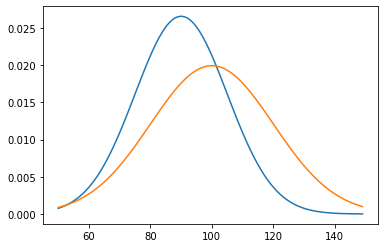

In [4]:
x = np.arange(50,150)

y1 = stats.norm(mean1, std1).pdf(x)
y2 = stats.norm(mean2, std2).pdf(x)

plt.plot(x,y1)
plt.plot(x,y2)

In [5]:
std1**2, std2**2

(225, 400)

In [6]:
t,p = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
t,p,alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [7]:
# We reject the null hypothesis

2. Load the mpg dataset and use it to answer the following questions:

In [8]:
mpg = data('mpg')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
132,land rover,range rover,4.2,2008,8,auto(s6),4,12,18,r,suv
18,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact
163,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
61,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv


a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Step 4.

- More than 30 observations
- independent samples
- Fairly equal variance

In [9]:
# Null Hypothesis: Fuel efficiency in cars from 2008 vs 1999 is the same.
# Alternate Hypothesis: Fuel efficiency in cars from 2008 vs 1999 is different

In [10]:
mpg['mpg'] = round((mpg.cty + mpg.hwy) / 2).astype(int)
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv,13
194,toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact,27
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup,16
91,ford,mustang,3.8,1999,6,manual(m5),r,18,26,r,subcompact,22
129,jeep,grand cherokee 4wd,5.7,2008,8,auto(l5),4,13,18,r,suv,16


<AxesSubplot:>

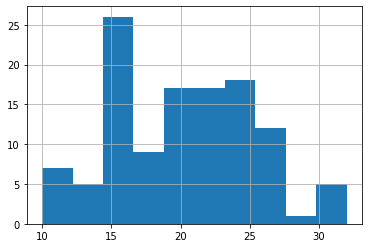

In [11]:
cars_2008 = mpg[mpg.year == 2008].mpg
cars_2008.hist()

<AxesSubplot:>

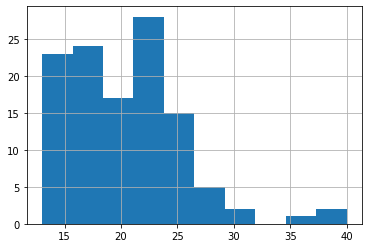

In [12]:
cars_1999 = mpg[mpg.year == 1999].mpg
cars_1999.hist()

In [13]:
cars_2008.count(), cars_1999.count()

(117, 117)

In [14]:
alpha = 0.05

In [15]:
cars_2008.var(), cars_1999.var()

(24.8745947539051, 26.351458885941646)

In [16]:
stats.levene(cars_2008, cars_1999)

LeveneResult(statistic=0.18278366922458814, pvalue=0.6693883864566512)

In [17]:
t,p = stats.ttest_ind(cars_2008, cars_1999)
t,p,alpha

(-0.24542297716258815, 0.8063459014623406, 0.05)

In [18]:
# We fail to reject the null hypothesis

b. Are compact cars more fuel-efficient than the average car?

In [19]:
# Null Hypothesis: Fuel efficiency in compact cars is <= fuel efficiency in the average car.
# Alternate Hypothesis: Fuel efficiency in compact cars is > fuel efficiency in the average car.

<AxesSubplot:>

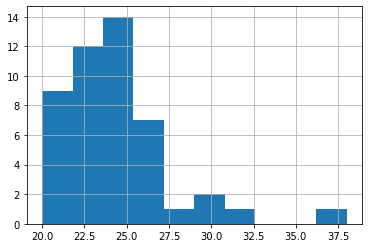

In [20]:
compact_cars = mpg[mpg['class'] == 'compact'].mpg
compact_cars.hist()

<AxesSubplot:>

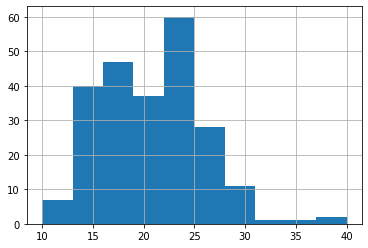

In [21]:
average_cars = mpg.mpg
average_cars.hist()

In [22]:
compact_cars.count(), average_cars.count()

(47, 234)

In [23]:
alpha = 0.05

In [24]:
t,p = stats.ttest_1samp(compact_cars, average_cars.mean())
t, p/2, alpha

(7.900972010653462, 2.0703184649467577e-10, 0.05)

In [25]:
# We fail to reject the null hypothesis

c. Do manual cars get better gas mileage than automatic cars?

In [26]:
# Null Hypthesis: Manual cars get <= gas mileage than automatic cars.
# Alternate Hypothesis: Manual cars get > gas mileage than automatic cars.

<AxesSubplot:>

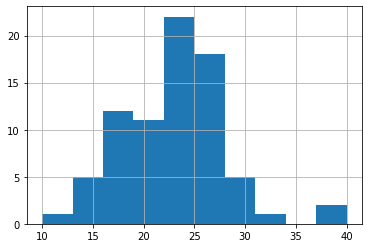

In [27]:
manual_mpg = mpg[mpg.trans.str.startswith('man')].mpg
manual_mpg.hist()

<AxesSubplot:>

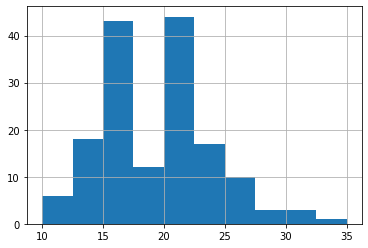

In [28]:
automatic_mpg = mpg[mpg.trans.str.startswith('auto')].mpg
automatic_mpg.hist()

In [29]:
alpha = 0.05

In [30]:
len(manual_mpg), len(automatic_mpg)

(77, 157)

In [31]:
manual_mpg.var(), automatic_mpg.var()

(26.38482570061516, 22.09096847950349)

In [32]:
stats.levene(manual_mpg, automatic_mpg)

LeveneResult(statistic=0.2855150329227081, pvalue=0.593620706753822)

In [33]:
t, p = stats.ttest_ind(manual_mpg, automatic_mpg)
t, p, alpha

(4.577362852417845, 7.677168617852477e-06, 0.05)

In [34]:
# We reject the null hypothesis

### Correlation Exercises

1. Use the telco_churn data. 

In [35]:
df = pd.read_csv('telco_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5159,5928-QLDHB,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,No
4503,9658-WYUFB,Female,0,No,No,17,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.40,1617.50,Yes
452,8847-GEOOQ,Male,0,Yes,No,60,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),60.20,3582.40,No
2011,1492-QGCLU,Male,0,Yes,Yes,53,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,85.70,4616.10,No
2670,4531-AUZNK,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,95.15,5000.05,No


a. Does tenure correlate with monthly charges? 

In [36]:
# Null Hypothesis: There is no linear correlation between tenure and monthly charges
# Null Hypothesis: There is a linear correlation between tenure and monthly charges

In [37]:
tenure = df.tenure
monthly_charges = df.MonthlyCharges

In [38]:
corr, p = stats.pearsonr(tenure, monthly_charges)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

b. Total charges?

In [39]:
# Null Hypothesis: There is no linear correlation between tenure and total charges
# Null Hypothesis: There is a linear correlation between tenure and total charges

In [40]:
total_charges = df.TotalCharges.fillna(0)
total_charges.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [41]:
corr, p = stats.pearsonr(tenure, total_charges)
corr, p

(0.8261783979502477, 0.0)

In [42]:
# We reject the null hypothesis

c. What happens if you control for phone and internet service?

2. Use the employees database.

In [48]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    
sql = """
    SELECT emp_no, hire_date, salary, title
    from employees
    join salaries using(emp_no)
    join titles using(emp_no);
"""

url = get_db_url("employees")

employees = pd.read_sql(sql, url)
employees.head()

,emp_no,hire_date,salary,title
0,10001,1986-06-26,60117,Senior Engineer
1,10001,1986-06-26,62102,Senior Engineer
2,10001,1986-06-26,66074,Senior Engineer
3,10001,1986-06-26,66596,Senior Engineer
4,10001,1986-06-26,66961,Senior Engineer


In [49]:
from datetime import date

In [56]:
employees['tenure'] = round((date.today() - employees.hire_date) / np.timedelta64(1, 'M')).astype(int)

In [57]:
employees.sample(20)

,emp_no,hire_date,salary,title,tenure
2143649,238300,1993-09-30,77730,Staff,337
2865294,285044,1992-04-14,50266,Engineer,355
1563422,200651,1992-07-29,66489,Engineer,351
4125458,466573,1994-05-17,84867,Staff,330
4316267,479022,1988-03-14,60232,Engineer,404
4323744,479504,1986-10-12,50680,Senior Engineer,421
2457488,258669,1985-10-02,95994,Assistant Engineer,433
3067529,298120,1987-03-03,65684,Senior Staff,416
3179128,405453,1988-07-13,81163,Staff,400
1991597,228384,1993-12-17,40875,Staff,335


a. Is there a relationship between how long an employee has been with the company and their salary?

b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

3. Use the sleepstudy data. Is there a relationship between days and reaction time?